In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_path = '../train_1.csv/train_1.csv'
import csv


def data_rows(filepath):
    with open(data_path) as csvfile:
        spamreader = csv.reader(csvfile)
        
        #next(spamreader) #skip first row        
        
        while(True):
            try:
               next_value = next(spamreader)
            except:
                continue

            if next_value == None:
                break
            
            yield next_value

In [4]:
def get_page_info(page):
    underscore_split = page.split("_")
    
    agent = underscore_split[-1]
    access_type = underscore_split[-2]
    pagelang = underscore_split[-3].split(".")[0]
    pagename = "_".join(underscore_split[:-3])
    
    return pagename, pagelang, access_type, agent

In [7]:
def find_max_min_indexes(arr):
    max_indexes = list()
    min_indexes = list()
    
    last_delta = 0
    
    for i in range(1,len(arr)):
        delta_i = arr[i] - arr[i-1]
        
        #print(delta_i)
        
        if delta_i * last_delta < 0:
            if delta_i < 0:
                max_indexes.append(i-1)
            else:
                min_indexes.append(i-1)
        
        last_delta = delta_i
            
    return max_indexes, min_indexes

#find_max_min_indexes([1.5,1,3,-4,5,6])

In [8]:
def get_closest_pairs(arr1, arr2):
    p1_pairs = dict()
    p2_pairs = dict()
    
    #p_pair_scores = dict()

    #Objective is to minimize scores
    for p1 in arr1:
        for p2 in arr2:
            p_score = np.absolute(p1 - p2)

            #if not p1 in p_pair_scores or p_pair_scores[p1][1] > p_score
                #p_pair_scores[p1] = (p2, p_score)
            
                        
            #if not p2 in p_pair_scores or p_pair_scores[p2][1] > p_score
                #p_pair_scores[p2] = (p1, p_score)
            
            if not p1 in p1_pairs or p1_pairs[p1][1] > p_score:
                p1_pairs[p1] = (p2, p_score)
                
            if not p2 in p2_pairs or p2_pairs[p2][1] > p_score:
                p2_pairs[p2] = (p1, p_score)
            

    #Get pairs indexes 
    p1_pairs_set = set()
    for p1, (p2, _) in p1_pairs.items():
        p1_pairs_set.add((p1, p2))
        
    p2_pairs_set = set()
    for p2, (p1, _) in p2_pairs.items():
        p2_pairs_set.add((p1, p2))
        
    return list(p1_pairs_set.intersection(p2_pairs_set))

In [9]:
def get_interp_value(x, x_list, y_list):
    assert len(x_list) == len(y_list)

    try:
        value_index = x_list.index(x) 
        return y_list[value_index]
    except:
        pass


    #[0, 1.5, 2.5, 3.5]
    #[10, 20, 30, 40]

    #1?
    #1.5 - 1 = 0.5

    #20-10/1.5-0 = 10-

    #ax+b=y

    #b = y-ax

    #If value not found, must interpolate
    for i, v in enumerate(x_list):
        if v > x:
            #Calculate factor
            zero_offset_y = [0] + list(y_list)
            zero_offset_x = [0] + list(x_list)

            a_fact = (zero_offset_y[i+1] - zero_offset_y[i]) / (zero_offset_x[i+1] - zero_offset_x[i])
            b_fact = zero_offset_y[i+1] - zero_offset_x[i+1]*a_fact
            return x * a_fact + b_fact

In [70]:
def get_curve_functions(x_values, y_values, deg=10):
    poly_1 = np.polyfit(x_values, y_values, 1)
    poly_10 = np.polyfit(x_values, y_values, deg)
    
    func_1 = np.poly1d(poly_1)
    func_10 = np.poly1d(poly_10)
    
    def func_neutral(values):
        return func_10(values) - func_1(values)
    
    return func_1, func_10, func_neutral

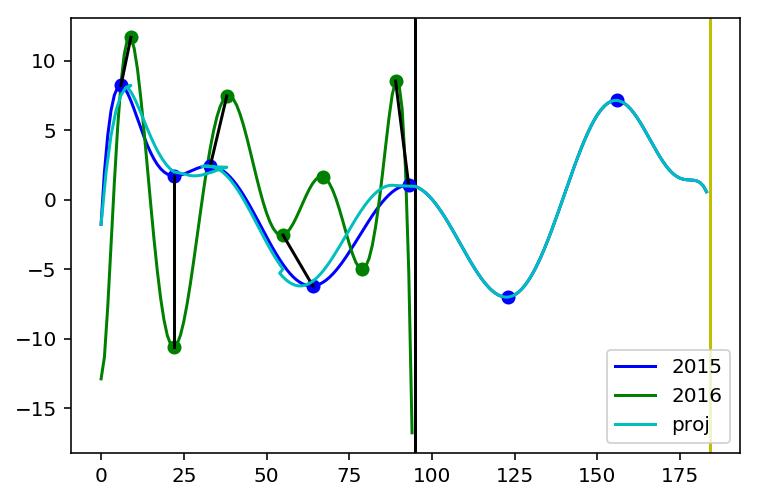

In [72]:
def proj_test_1(r, proj_range=90):
    page_data = get_page_info(r[0])
    page_name = page_data[0]
    
    #print(page_name)
    
    r = np.array(r[1:]).astype(np.int)
    
    
    values_2015 = r[0:184] #jul-2015 - dez-2015
    values_2016 = r[366:366 + proj_range]  #jul-2016 - dez-2016
    values_2016_true = r[366:]
    
    plt.axvline(x=proj_range, color='k')
    plt.axvline(x=len(values_2015), color='y')


    
    days_2015 = list(range(len(values_2015)))
    days_2016 = list(range(len(values_2016)))
    days_2016_true = list(range(len(values_2016_true)))
    
    #Fit polynomial lines to the datas
    f_2015_1, f_2015_10, f_neutral_2015 = get_curve_functions(days_2015, values_2015)
    f_2016_1, f_2016_10, f_neutral_2016 = get_curve_functions(days_2016, values_2016)
    f_2016_1_true, f_2016_10_true, f_neutral_2016_true = get_curve_functions(days_2016_true, values_2016_true)

    #Get neutral values (without growing linear component)
    neutral_2015_y_values = f_neutral_2015(days_2015)
    neutral_2016_y_values = f_neutral_2016(days_2016)
    
    neutral_2016_y_values_true = f_neutral_2016_true(days_2016_true)
    
    plt.plot(days_2015, neutral_2015_y_values, 'b', label='2015')
    plt.plot(days_2016, neutral_2016_y_values, 'g', label='2016')
    #plt.plot(days_2016_true, neutral_2016_y_values_true, 'g', label='2016')
    
    
    #Max and min values
    
    p_2015_max, p_2015_min = find_max_min_indexes(neutral_2015_y_values)
    p_2016_max, p_2016_min = find_max_min_indexes(neutral_2016_y_values)    
    
    plt.plot(p_2015_max + p_2015_min, f_neutral_2015(p_2015_max + p_2015_min), 'bo')
    plt.plot(p_2016_max + p_2016_min, f_neutral_2016(p_2016_max + p_2016_min), 'go')
    
    
    #Get values to match phases
    max_pairs_indexes = get_closest_pairs(p_2015_max, p_2016_max)
    min_pairs_indexes = get_closest_pairs(p_2015_min, p_2016_min)
    
    
    #Check and remove crossed lines
    remove_crossed_pairs = list()
         
    for p1max, p2max in max_pairs_indexes:
        for p1min, p2min in min_pairs_indexes:
            if (p1max < p1min and p2max > p2min) or (p1max > p1min and p2max < p2min):
                #print("CROSSED LINE")
                if np.absolute(p1max - p2max) < np.absolute(p1min - p2min):
                    remove_crossed_pairs.append((p1min, p2min))
                else:
                    remove_crossed_pairs.append((p1max, p2max))
    
    
    #Get final interpolation points, removing crossing lines
    interp_points = set()
        
    for p_1, p_2 in max_pairs_indexes + min_pairs_indexes:
        if (p_1, p_2) not in remove_crossed_pairs:
            plt.plot([p_1, p_2],[f_neutral_2015(p_1), f_neutral_2016(p_2)], 'k')
            interp_points.add((p_1, p_2))
            
    interp_points = sorted(interp_points, key=lambda a: a[0])        
        
    
    interp_x = list()
    #factors_list = list()
        
    last_i = 0 #last procesed day
    
    current_offset = 0
        
    for p_1, p_2 in interp_points:

        #p_2_offset = p_2 - current_offset
        
        factor = float(p_2) / (p_1 + current_offset)
        #factors_list.append(factor)

        while( (p_1 + current_offset) >= last_i):
            interp_x.append(last_i*factor)
            last_i += 1 
            
        current_offset += p_1 - p_2
    
    
    #factor_mean = np.mean(factors_list) 
    #print(factor_mean)

    #proj_factor = float(len(interp_x)) / len(days_2015)
    
    #proj_factor2 = (len(days_2015) - proj_range) / last_i
    #print(last_i)
    
    while(len(interp_x) < len(days_2015)):
        interp_x.append(last_i)
        last_i += 1

    #interp_x = sorted(interp_x)
    
    
    transformed_2015_values = values_2015 - f_2015_1(days_2015) + f_2016_1(days_2015)
    plt.plot(interp_x, neutral_2015_y_values, 'c', label='proj')
    #plt.plot(interp_x, neutral_2015_y_values + f_2016_1(days_2015), 'c', label='proj')
    #plt.plot(interp_x, transformed_2015_values, 'c', label='proj')
    

    plt.legend()
    #plt.grid()
    plt.show()     
        
        
        
        
    #Calculate mean square error
    square_error_sum = 0
    for d in days_2015:
        interp_val = get_interp_value(d, interp_x, transformed_2015_values)
        square_error_sum += (interp_val - values_2016_true[d])**2
        
    mean_square_error = square_error_sum / len(values_2016_true)
    
    return mean_square_error
    
    
    
#Test
d_rows = data_rows(data_path)
next(d_rows) #skip first line    
    
start_index = 0
stop_index = 0
for i, r in enumerate(d_rows):
    if i < start_index:
        continue
    try:  
        #steps = [20,40,60,80,100,120,140,160,180]
        steps = [95]
        mse_list = list()
        for step in steps:
            mse = proj_test_1(r, step)
            mse_list.append(mse)
            
        #plt.plot(steps, mse_list)
        #plt.show()
    
    except Exception as e:
        print(e)
        
    if i >= stop_index: 
        break

In [ ]:
#2015-07-01 - 2015-12-31: [1:185]
#2016-01-01 - 2016-06-30: [185:367]
#2016-07-01 - 2016-12-31: [367:]

import math

d_rows = data_rows(data_path)

next(d_rows) #skip first line

for i, r in enumerate(d_rows):
    try:
        page_data = get_page_info(r[0])
        page_name = page_data[0]
        print(page_name)
        
        r = np.array(r[1:]).astype(np.int)
        
        values_2015 = r[0:184]
        values_2016 = r[366:]
        
        assert len(values_2015) == len(values_2016)
        
        days = range(len(values_2015))
        
        #print(days, values_2015)
        
        
        
        
        z1 = np.polyfit(days, values_2015, 10)
        z11 = np.polyfit(days, values_2015, 1)
        p1 = np.poly1d(z1)
        
        p11 = np.poly1d(z11)
        
        z2 = np.polyfit(days, values_2016, 10)
        z21 = np.polyfit(days, values_2016, 1)
        p2 = np.poly1d(z2)
        p21 = np.poly1d(z21)
        
        
        #plt.plot(values_2015)
        #plt.plot(days, p1(days))
        #plt.show()
        
        #plt.plot(values_2016)
        #plt.plot(days, p2(days))
        #plt.show()
        
        print(page_name)
        #p1_values = p1(days)
        #delta_p1 = list()
        #print(len(p1_values))
        #for i in range(1,len(p1_values)):
            #delta_p1.append(p1_values[i] - p1_values[i-1])
            
            
        neutral_p1_y_values = p1(days) - p11(days)
        neutral_p2_y_values = p2(days) - p21(days)
        
        #p1_max, p1_min = find_max_min_indexes(p1(days))
        #p2_max, p2_min = find_max_min_indexes(p2(days))
        
        p1_max, p1_min = find_max_min_indexes(neutral_p1_y_values)
        p2_max, p2_min = find_max_min_indexes(neutral_p2_y_values)
        
        #Match max points
        #print(p1_max, p2_max)
        
            
        max_pairs_indexes = get_closest_pairs(p1_max, p2_max)
        min_pairs_indexes = get_closest_pairs(p1_min, p2_min)
        
        remove_crossed_pairs = list()
        
        #Check crossed lines
        for p1max, p2max in max_pairs_indexes:
            for p1min, p2min in min_pairs_indexes:
                if (p1max < p1min and p2max > p2min) or (p1max > p1min and p2max < p2min):
                    #print("CROSSED LINE")
                    if np.absolute(p1max - p2max) < np.absolute(p1min - p2min):
                        remove_crossed_pairs.append((p1min, p2min))
                    else:
                        remove_crossed_pairs.append((p1max, p2max))
        
        
        #print(max_pairs_indexes)
        #print(min_pairs_indexes)
            
        #print(pairs_indexes)
        
        interp_points = set()
        
        for p_1, p_2 in max_pairs_indexes + min_pairs_indexes:
            if (p_1, p_2) not in remove_crossed_pairs:
                #plt.plot([p_1, p_2],[p1(p_1), p2(p_2)], 'k')
                interp_points.add((p_1, p_2))
            
        
        interp_points = sorted(interp_points, key=lambda a: a[0])
        
        print(interp_points)
        
        #Generate interpolated curve - color: c
        #p1 - 2015
        #p2 - 2016
        
        interp_x = list()
        factors_list = list()
        
        #last_p = 0
        
        last_i = 0
        
        for p_1, p_2 in interp_points[:2]:
            
            factor = float(p_2) / p_1
            factors_list.append(factor)
            
            while( p_1 >= last_i):
                #y_value = p1(days)[last_i]
                interp_x.append(last_i*factor)
                last_i += 1
            
          
        factor_mean = np.mean(factors_list) 
        print(factor_mean)
        
        y_values = p1(days)
        
        while(len(interp_x) < len(y_values)):
            interp_x.append(last_i*factor_mean)
            last_i += 1
            
           
        interp_x = sorted(interp_x)
        
        #z3 = np.polyfit(interp_x, p1(days)[:181], 10)
        #p3 = np.poly1d(z3)
            
        #plt.plot(p3(days), 'c', label='proj')
        #plt.plot(interp_x, y_values, 'c', label='proj')
                
            
            #print(p_1, p_2)
            #print(p1(days))
            #break
        
        diff_p1 = p1(days) - p11(days)*0
        diff_p2 = p2(days) - p21(days)*0
        
        proj_y_values = y_values - p11(days) + p21(days)
        plt.plot(interp_x, proj_y_values, 'c', label='proj')
        
        #plt.plot(p1_max + p1_min, p1(p1_max + p1_min), 'bo')
        #plt.plot(p2_max + p2_min, p2(p2_max + p2_min), 'go')
        
        plt.plot(diff_p1, 'b', label='2015')
        plt.plot(diff_p2, 'g', label='2016')
        
        #plt.plot(values_2015)
        #plt.plot(values_2016)
        
        #plt.plot(p11(days))
        #plt.plot(p21(days))
        
        plt.legend()
        plt.show()
        
        #print(r[367:])
        #r = np.array(r[6:-6]).astype(np.int) #Get valid weeks
        #row_weeks = split_row_into_weeks(r)
        #norm_row_weeks = row_weeks / np.sum(row_weeks, axis=1).reshape([77,1])
        #week_days_sum = np.sum(norm_row_weeks, axis=0)

        #print(week_days_sum)
        #print("Mean: {} Stddev: {}".format(np.mean(week_days_sum), np.std(week_days_sum)))
        #plt.plot(np.mean(norm_row_weeks, axis=0))
        #plt.show()
        
        #print(np.mean(norm_row_weeks, axis=0))
        #print(np.std(norm_row_weeks, axis=0))
        #print()
        
    except Exception as e:
        print(e)

    
    if i >= 0: 
        break
#must find way to detect crossed lines and rearrange them